In [5]:
# Load all depths and calculate mean metrics across all runs for each depth
import sys
import os
sys.path.append(os.path.join(os.path.dirname(os.getcwd())))

import pickle
import numpy as np

results_dir = '../results_losses_gauss_3class'

# Define depths and loss types to analyze
depths = [1, 2, 3, 4, 5, 6, 7, 8]
loss_types = ["hilbert_schmidt", "pre_determine_inner", "log_likelihood_macro"]
depth_loss_results = {}

for depth in depths:
    depth_loss_results[depth] = {}
    
    for loss_type in loss_types:
        # Filter TQFM pickle files for this depth and loss type
        pattern = f'tqfm_{loss_type}_depth{depth}_'
        tqfm_files = [f for f in os.listdir(results_dir) if f.endswith('.pkl') and pattern in f]
        
        if not tqfm_files:
            print(f"No files found for depth {depth}, loss {loss_type}")
            continue
        
        # Load all models for this depth and loss type
        models_data = []
        for tqfm_file in sorted(tqfm_files):
            try:
                with open(os.path.join(results_dir, tqfm_file), 'rb') as f:
                    tqfm = pickle.load(f)
                    
                    # Skip if best_params is None
                    if tqfm.best_params is None:
                        print(f"  Skipping {tqfm_file}: best_params is None")
                        continue
                    
                    final_loss = tqfm.loss_history[-1] if len(tqfm.loss_history) > 0 else None
                    train_acc = tqfm.train_accuracy_history[-1] if tqfm.train_accuracy_history else None
                    
                    if final_loss is not None and train_acc is not None:
                        models_data.append({
                            'tqfm': tqfm,
                            'file': tqfm_file,
                            'loss': final_loss,
                            'train_acc': train_acc
                        })
            except Exception as e:
                print(f"  Error loading {tqfm_file}: {e}")
        
        if models_data:
            # Calculate mean metrics across all valid runs
            mean_loss = np.mean([m['loss'] for m in models_data])
            std_loss = np.std([m['loss'] for m in models_data])
            mean_train_acc = np.mean([m['train_acc'] for m in models_data])
            std_train_acc = np.std([m['train_acc'] for m in models_data])
            
            depth_loss_results[depth][loss_type] = {
                'mean_loss': mean_loss,
                'std_loss': std_loss,
                'mean_train_acc': mean_train_acc,
                'std_train_acc': std_train_acc,
                'n_runs': len(models_data),
                'models': models_data
            }
            
            print(f"Depth {depth}, {loss_type}: {len(models_data)} valid runs")
            print(f"  Mean Loss: {mean_loss:.6f} ± {std_loss:.6f}")
            print(f"  Mean Train Acc: {mean_train_acc:.4f} ± {std_train_acc:.4f}")

print(f"\nTotal depths analyzed: {len(depth_loss_results)}")
print(f"Loss types: {loss_types}")

Depth 1, hilbert_schmidt: 20 valid runs
  Mean Loss: 0.845881 ± 0.019349
  Mean Train Acc: 0.9347 ± 0.0297
Depth 1, pre_determine_inner: 20 valid runs
  Mean Loss: 0.474129 ± 0.031119
  Mean Train Acc: 0.7950 ± 0.0847
Depth 1, log_likelihood_macro: 20 valid runs
  Mean Loss: 0.948984 ± 0.087656
  Mean Train Acc: 0.8340 ± 0.0427
Depth 2, hilbert_schmidt: 20 valid runs
  Mean Loss: 0.829692 ± 0.027444
  Mean Train Acc: 0.9397 ± 0.0276
Depth 2, pre_determine_inner: 20 valid runs
  Mean Loss: 0.422411 ± 0.039295
  Mean Train Acc: 0.8410 ± 0.0458
Depth 2, log_likelihood_macro: 20 valid runs
  Mean Loss: 0.758718 ± 0.091794
  Mean Train Acc: 0.8673 ± 0.0461
Depth 3, hilbert_schmidt: 20 valid runs
  Mean Loss: 0.816052 ± 0.022009
  Mean Train Acc: 0.9337 ± 0.0205
Depth 3, pre_determine_inner: 20 valid runs
  Mean Loss: 0.399358 ± 0.026721
  Mean Train Acc: 0.8647 ± 0.0451
Depth 3, log_likelihood_macro: 20 valid runs
  Mean Loss: 0.656433 ± 0.063756
  Mean Train Acc: 0.8790 ± 0.0269
Depth 4, h

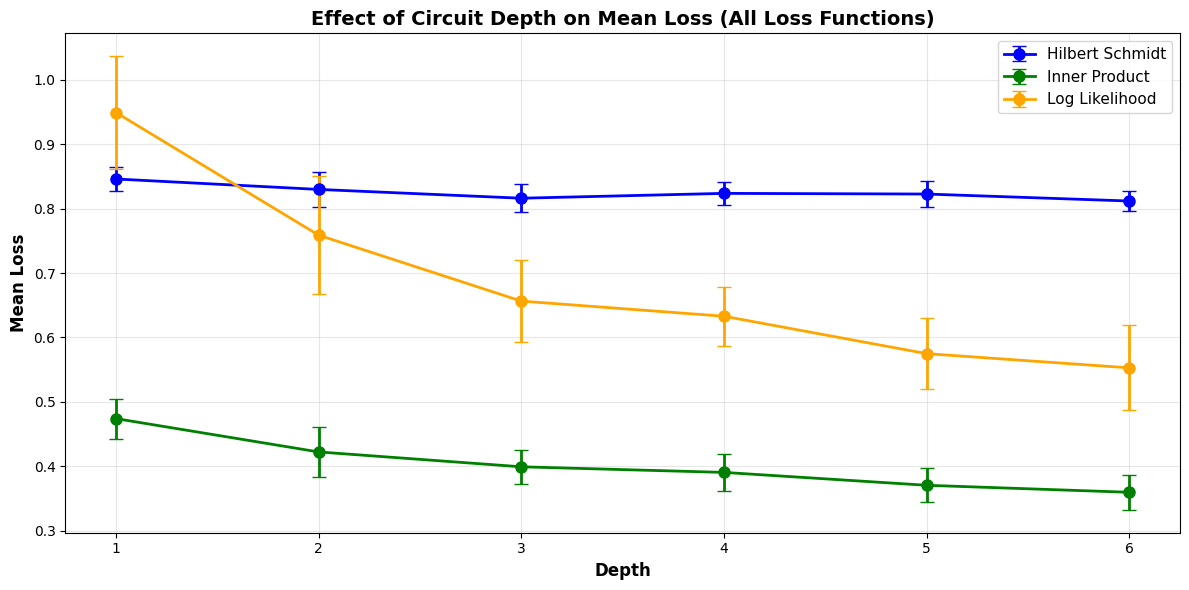

Mean Loss Summary:

HILBERT_SCHMIDT:
  Depth 1: 0.845881 ± 0.019349 (n=20)
  Depth 2: 0.829692 ± 0.027444 (n=20)
  Depth 3: 0.816052 ± 0.022009 (n=20)
  Depth 4: 0.823567 ± 0.017414 (n=20)
  Depth 5: 0.822531 ± 0.020790 (n=20)
  Depth 6: 0.811708 ± 0.016166 (n=20)

PRE_DETERMINE_INNER:
  Depth 1: 0.474129 ± 0.031119 (n=20)
  Depth 2: 0.422411 ± 0.039295 (n=20)
  Depth 3: 0.399358 ± 0.026721 (n=20)
  Depth 4: 0.390673 ± 0.029229 (n=20)
  Depth 5: 0.370675 ± 0.026502 (n=20)
  Depth 6: 0.359838 ± 0.027538 (n=20)

LOG_LIKELIHOOD_MACRO:
  Depth 1: 0.948984 ± 0.087656 (n=20)
  Depth 2: 0.758718 ± 0.091794 (n=20)
  Depth 3: 0.656433 ± 0.063756 (n=20)
  Depth 4: 0.632968 ± 0.045757 (n=20)
  Depth 5: 0.574904 ± 0.054950 (n=20)
  Depth 6: 0.552888 ± 0.065998 (n=20)


In [6]:
# Visualize Mean Loss vs Depth for all loss types
import matplotlib.pyplot as plt
import numpy as np

depths_list = sorted([d for d in depth_loss_results.keys() if depth_loss_results[d]])

plt.figure(figsize=(12, 6))

colors = {'hilbert_schmidt': 'blue', 'pre_determine_inner': 'green', 'log_likelihood_macro': 'orange'}
labels = {'hilbert_schmidt': 'Hilbert Schmidt', 'pre_determine_inner': 'Inner Product', 'log_likelihood_macro': 'Log Likelihood'}
for loss_type in loss_types:
    losses = []
    stds = []
    valid_depths = []
    
    for d in depths_list:
        if loss_type in depth_loss_results[d]:
            losses.append(depth_loss_results[d][loss_type]['mean_loss'])
            stds.append(depth_loss_results[d][loss_type]['std_loss'])
            valid_depths.append(d)
    
    if losses:
        plt.errorbar(valid_depths, losses, yerr=stds, marker='o', linestyle='-', 
                    linewidth=2, markersize=8, capsize=5, 
                    label=labels[loss_type],
                    color=colors[loss_type])

plt.xlabel('Depth', fontsize=12, fontweight='bold')
plt.ylabel('Mean Loss', fontsize=12, fontweight='bold')
plt.title('Effect of Circuit Depth on Mean Loss (All Loss Functions)', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.xticks(depths_list)
plt.tight_layout()
plt.show()

print("Mean Loss Summary:")
for loss_type in loss_types:
    print(f"\n{loss_type.upper()}:")
    for d in depths_list:
        if loss_type in depth_loss_results[d]:
            result = depth_loss_results[d][loss_type]
            print(f"  Depth {d}: {result['mean_loss']:.6f} ± {result['std_loss']:.6f} (n={result['n_runs']})")

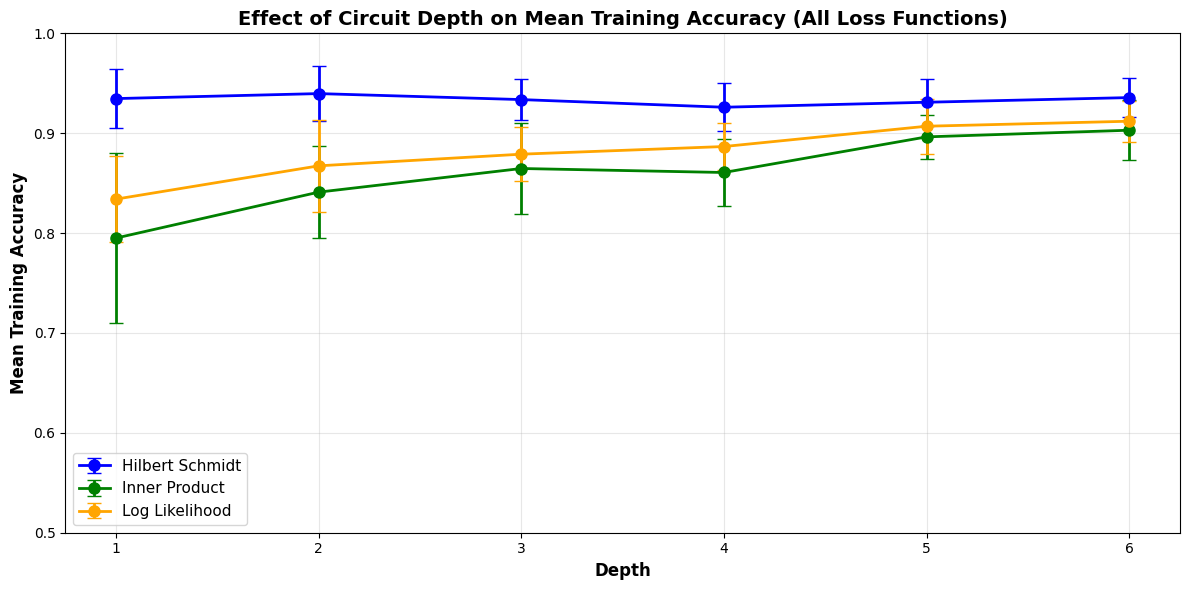


Mean Training Accuracy Summary:

HILBERT_SCHMIDT:
  Depth 1: 0.9347 ± 0.0297 (n=20)
  Depth 2: 0.9397 ± 0.0276 (n=20)
  Depth 3: 0.9337 ± 0.0205 (n=20)
  Depth 4: 0.9260 ± 0.0240 (n=20)
  Depth 5: 0.9310 ± 0.0236 (n=20)
  Depth 6: 0.9357 ± 0.0198 (n=20)

PRE_DETERMINE_INNER:
  Depth 1: 0.7950 ± 0.0847 (n=20)
  Depth 2: 0.8410 ± 0.0458 (n=20)
  Depth 3: 0.8647 ± 0.0451 (n=20)
  Depth 4: 0.8607 ± 0.0339 (n=20)
  Depth 5: 0.8963 ± 0.0220 (n=20)
  Depth 6: 0.9030 ± 0.0300 (n=20)

LOG_LIKELIHOOD_MACRO:
  Depth 1: 0.8340 ± 0.0427 (n=20)
  Depth 2: 0.8673 ± 0.0461 (n=20)
  Depth 3: 0.8790 ± 0.0269 (n=20)
  Depth 4: 0.8867 ± 0.0232 (n=20)
  Depth 5: 0.9070 ± 0.0277 (n=20)
  Depth 6: 0.9120 ± 0.0206 (n=20)


In [7]:
# Visualize Mean Training Accuracy vs Depth for all loss types
depths_list = sorted([d for d in depth_loss_results.keys() if depth_loss_results[d]])

plt.figure(figsize=(12, 6))

colors = {'hilbert_schmidt': 'blue', 'pre_determine_inner': 'green', 'log_likelihood_macro': 'orange'}
labels = {'hilbert_schmidt': 'Hilbert Schmidt', 'pre_determine_inner': 'Inner Product', 'log_likelihood_macro': 'Log Likelihood'}
for loss_type in loss_types:
    train_accs = []
    stds = []
    valid_depths = []
    
    for d in depths_list:
        if loss_type in depth_loss_results[d]:
            train_accs.append(depth_loss_results[d][loss_type]['mean_train_acc'])
            stds.append(depth_loss_results[d][loss_type]['std_train_acc'])
            valid_depths.append(d)
    
    if train_accs:
        plt.errorbar(valid_depths, train_accs, yerr=stds, marker='o', linestyle='-', 
                    linewidth=2, markersize=8, capsize=5,
                    label=labels[loss_type],
                    color=colors[loss_type])

plt.xlabel('Depth', fontsize=12, fontweight='bold')
plt.ylabel('Mean Training Accuracy', fontsize=12, fontweight='bold')
plt.title('Effect of Circuit Depth on Mean Training Accuracy (All Loss Functions)', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.xticks(depths_list)
plt.ylim([0.5, 1.0])
plt.tight_layout()
plt.show()

print("\nMean Training Accuracy Summary:")
for loss_type in loss_types:
    print(f"\n{loss_type.upper()}:")
    for d in depths_list:
        if loss_type in depth_loss_results[d]:
            result = depth_loss_results[d][loss_type]
            print(f"  Depth {d}: {result['mean_train_acc']:.4f} ± {result['std_train_acc']:.4f} (n={result['n_runs']})")

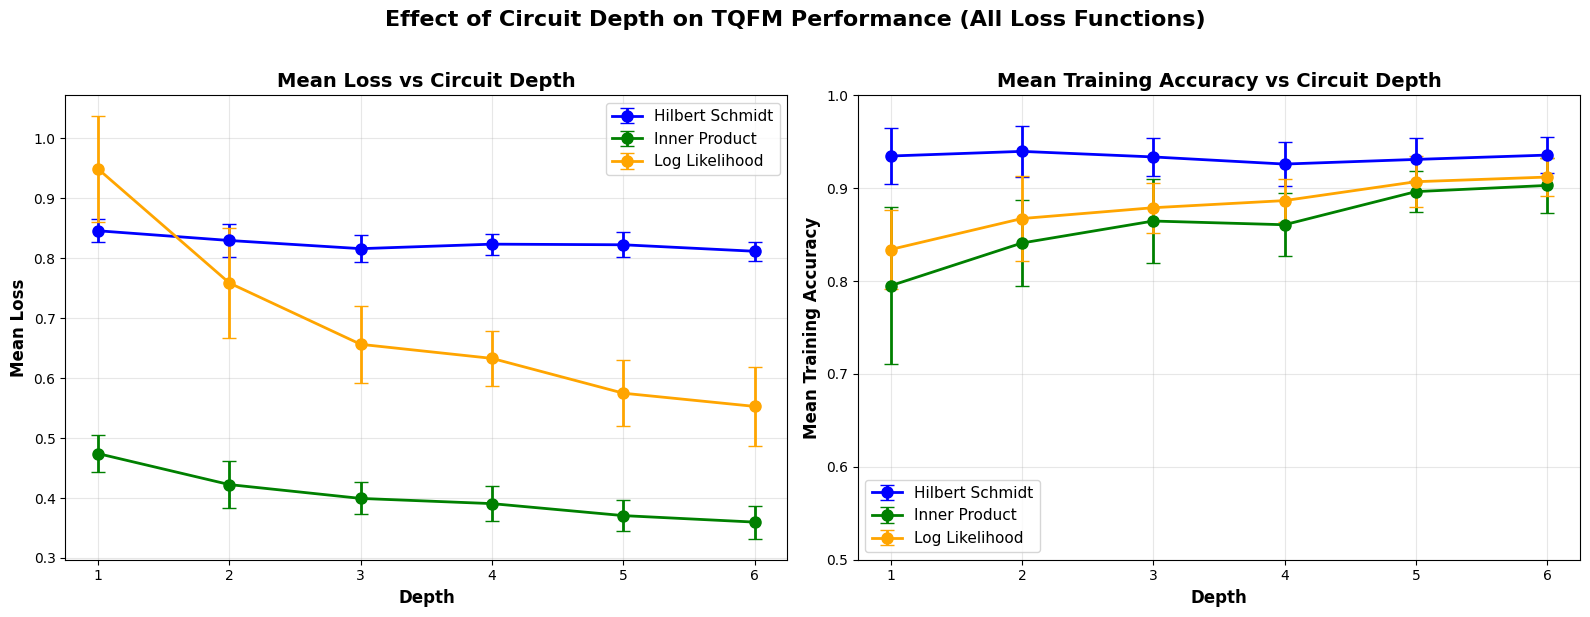

In [8]:
# Combined visualization: Mean Loss and Mean Accuracy for all loss types
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

depths_list = sorted([d for d in depth_loss_results.keys() if depth_loss_results[d]])
colors = {'hilbert_schmidt': 'blue', 'pre_determine_inner': 'green', 'log_likelihood_macro': 'orange'}
labels = {'hilbert_schmidt': 'Hilbert Schmidt', 'pre_determine_inner': 'Inner Product', 'log_likelihood_macro': 'Log Likelihood'}

# Left plot: Mean Loss vs Depth
for loss_type in loss_types:
    if loss_type not in colors:
        continue
    
    losses = []
    stds = []
    valid_depths = []
    
    for d in depths_list:
        if loss_type in depth_loss_results[d]:
            losses.append(depth_loss_results[d][loss_type]['mean_loss'])
            stds.append(depth_loss_results[d][loss_type]['std_loss'])
            valid_depths.append(d)
    
    if losses:
        ax1.errorbar(valid_depths, losses, yerr=stds, marker='o', linestyle='-',
                    linewidth=2, markersize=8, capsize=5,
                    label=labels[loss_type],
                    color=colors[loss_type])

ax1.set_xlabel('Depth', fontsize=12, fontweight='bold')
ax1.set_ylabel('Mean Loss', fontsize=12, fontweight='bold')
ax1.set_title('Mean Loss vs Circuit Depth', fontsize=14, fontweight='bold')
ax1.legend(fontsize=11)
ax1.grid(True, alpha=0.3)
ax1.set_xticks(depths_list)

# Right plot: Mean Training Accuracy vs Depth
for loss_type in loss_types:
    if loss_type not in colors:
        continue
    train_accs = []
    stds = []
    valid_depths = []
    
    for d in depths_list:
        if loss_type in depth_loss_results[d]:
            train_accs.append(depth_loss_results[d][loss_type]['mean_train_acc'])
            stds.append(depth_loss_results[d][loss_type]['std_train_acc'])
            valid_depths.append(d)
    
    if train_accs:
        ax2.errorbar(valid_depths, train_accs, yerr=stds, marker='o', linestyle='-',
                    linewidth=2, markersize=8, capsize=5,
                    label=labels[loss_type],
                    color=colors[loss_type])

ax2.set_xlabel('Depth', fontsize=12, fontweight='bold')
ax2.set_ylabel('Mean Training Accuracy', fontsize=12, fontweight='bold')
ax2.set_title('Mean Training Accuracy vs Circuit Depth', fontsize=14, fontweight='bold')
ax2.legend(fontsize=11)
ax2.grid(True, alpha=0.3)
ax2.set_xticks(depths_list)
ax2.set_ylim([0.5, 1.0])

plt.suptitle('Effect of Circuit Depth on TQFM Performance (All Loss Functions)', 
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

Depth 1, Hilbert Schmidt: 20 runs
  Mean Time: 218.29s ± 80.29s (3.64 min)
Depth 1, Inner Product: 20 runs
  Mean Time: 211.63s ± 122.77s (3.53 min)
Depth 1, Log Likelihood: 20 runs
  Mean Time: 180.17s ± 130.03s (3.00 min)
Depth 2, Hilbert Schmidt: 20 runs
  Mean Time: 427.56s ± 113.39s (7.13 min)
Depth 2, Inner Product: 20 runs
  Mean Time: 399.84s ± 90.00s (6.66 min)
Depth 2, Log Likelihood: 20 runs
  Mean Time: 373.32s ± 77.96s (6.22 min)
Depth 3, Hilbert Schmidt: 20 runs
  Mean Time: 497.66s ± 18.51s (8.29 min)
Depth 3, Inner Product: 20 runs
  Mean Time: 496.03s ± 15.67s (8.27 min)
Depth 3, Log Likelihood: 20 runs
  Mean Time: 493.59s ± 24.86s (8.23 min)
Depth 4, Hilbert Schmidt: 20 runs
  Mean Time: 738.13s ± 217.73s (12.30 min)
Depth 4, Inner Product: 20 runs
  Mean Time: 729.91s ± 203.11s (12.17 min)
Depth 4, Log Likelihood: 20 runs
  Mean Time: 737.91s ± 215.04s (12.30 min)
Depth 5, Hilbert Schmidt: 20 runs
  Mean Time: 729.31s ± 176.72s (12.16 min)
Depth 5, Inner Product: 20

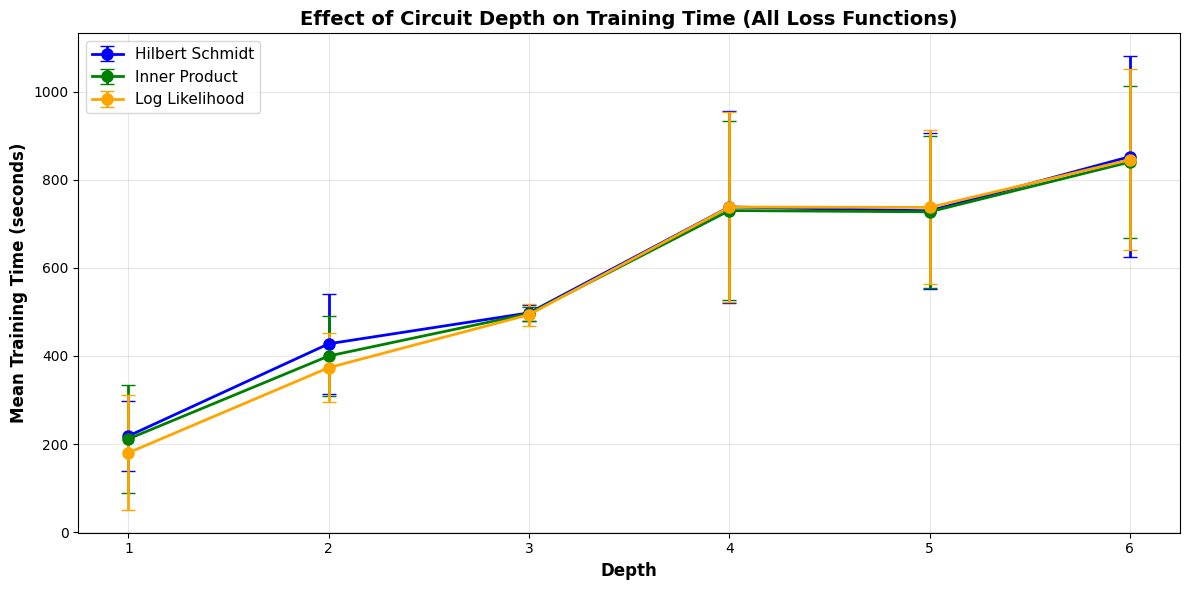


TRAINING TIME SUMMARY (seconds)
Depth   Hilbert Schmidt          Inner Product            Log Likelihood           
--------------------------------------------------------------------------------
1       218.3 ± 80.3             211.6 ± 122.8            180.2 ± 130.0            
2       427.6 ± 113.4            399.8 ± 90.0             373.3 ± 78.0             
3       497.7 ± 18.5             496.0 ± 15.7             493.6 ± 24.9             
4       738.1 ± 217.7            729.9 ± 203.1            737.9 ± 215.0            
5       729.3 ± 176.7            727.1 ± 171.8            737.1 ± 174.8            
6       852.4 ± 228.4            840.1 ± 172.8            845.3 ± 205.8            


In [12]:
# Analyze Training Time for all loss types across depths
import json
import glob

results_dir = '../results_losses_gauss_3class'
depths = [1, 2, 3, 4, 5, 6]
loss_types = ["hilbert_schmidt", "pre_determine_inner", "log_likelihood_macro"]
labels = {'hilbert_schmidt': 'Hilbert Schmidt', 'pre_determine_inner': 'Inner Product', 'log_likelihood_macro': 'Log Likelihood'}
colors = {'hilbert_schmidt': 'blue', 'pre_determine_inner': 'green', 'log_likelihood_macro': 'orange'}

# Collect training times
depth_time_results = {}

for depth in depths:
    depth_time_results[depth] = {}
    
    # Find all training_times JSON files for this depth
    pattern = f'{results_dir}/training_times_depth{depth}_*.json'
    time_files = glob.glob(pattern)
    
    if not time_files:
        print(f"No training time files found for depth {depth}")
        continue
    
    # Collect times for each loss type
    times_by_loss = {loss: [] for loss in loss_types}
    
    for time_file in time_files:
        try:
            with open(time_file, 'r') as f:
                data = json.load(f)
                individual_times = data.get('individual_training_times', {})
                
                for loss_type in loss_types:
                    if loss_type in individual_times:
                        times_by_loss[loss_type].append(individual_times[loss_type])
        except Exception as e:
            print(f"  Error loading {time_file}: {e}")
    
    # Calculate mean and std for each loss type
    for loss_type in loss_types:
        if times_by_loss[loss_type]:
            mean_time = np.mean(times_by_loss[loss_type])
            std_time = np.std(times_by_loss[loss_type])
            depth_time_results[depth][loss_type] = {
                'mean_time': mean_time,
                'std_time': std_time,
                'n_runs': len(times_by_loss[loss_type]),
                'all_times': times_by_loss[loss_type]
            }
            print(f"Depth {depth}, {labels[loss_type]}: {len(times_by_loss[loss_type])} runs")
            print(f"  Mean Time: {mean_time:.2f}s ± {std_time:.2f}s ({mean_time/60:.2f} min)")

# Visualize Training Time vs Depth
plt.figure(figsize=(12, 6))

for loss_type in loss_types:
    times = []
    stds = []
    valid_depths = []
    
    for d in depths:
        if d in depth_time_results and loss_type in depth_time_results[d]:
            times.append(depth_time_results[d][loss_type]['mean_time'])
            stds.append(depth_time_results[d][loss_type]['std_time'])
            valid_depths.append(d)
    
    if times:
        plt.errorbar(valid_depths, times, yerr=stds, marker='o', linestyle='-', 
                    linewidth=2, markersize=8, capsize=5, 
                    label=labels[loss_type],
                    color=colors[loss_type])

plt.xlabel('Depth', fontsize=12, fontweight='bold')
plt.ylabel('Mean Training Time (seconds)', fontsize=12, fontweight='bold')
plt.title('Effect of Circuit Depth on Training Time (All Loss Functions)', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.xticks(depths)
plt.tight_layout()
plt.show()

# Print summary table
print("\n" + "="*80)
print("TRAINING TIME SUMMARY (seconds)")
print("="*80)
print(f"{'Depth':<8}", end="")
for loss_type in loss_types:
    print(f"{labels[loss_type]:<25}", end="")
print()
print("-"*80)

for d in depths:
    print(f"{d:<8}", end="")
    for loss_type in loss_types:
        if d in depth_time_results and loss_type in depth_time_results[d]:
            result = depth_time_results[d][loss_type]
            print(f"{result['mean_time']:.1f} ± {result['std_time']:.1f}".ljust(25), end="")
        else:
            print("N/A".ljust(25), end="")
    print()
print("="*80)